# Regresyon Algoritmaları Nedir?

Makine öğrenmesinin temeli algoritmalara dayanmaktadır. Uygun model için uygun algoritmayı seçmek doğru tahmin için başarıyı arttırır. Bu seçimi yapabilmek için veriyi iyi analiz etmek ve algoritmaları iyi tanımak gerekir. Bu ve bundan sonraki yazı serilerinde makine öğrenmesi, derin öğrenme ve yapay zeka için kullanılan algoritmaları tanıyacağız. Bu seriye ilk olarak regresyon algoritmalarını anlatarak başlamak istedim.


## Regresyon Nedir?

Regresyon, bir bağımlı değişken ile diğer bağımsız değişkenler arasındaki ilişkinin gücünü belirlemeye çalışan bu güce göre tahminler ortaya koyan istatistiksel bir ölçümdür. Örneğin, bir çocuğun boyunu her yıl ölçerseniz, yılda yaklaşık 3 santim büyüdüğünü görebilirsiniz. Bu eğilim (yılda üç santim büyüyor) bir regresyon denklemi ile modellenebilir. Aslında, gerçek dünyadaki çoğu şey (gaz fiyatlarından kasırgalara) bir çeşit denklem ile modellenebilir; gelecekteki olayları tahmin etmemizi sağlar. 

Regresyon denklemleri, verilerinizin bir denkleme uygun olup olmadığını belirlemenize yardımcı olabilir. Gelecekteki tahminleri veya geçmiş davranışların göstergelerini kullanarak verilerinizden tahminlerde bulunmak istiyorsanız bu son derece yararlıdır. Örneğin, tasarruflarınızın gelecekte değerinin ne olacağını bilmek isteyebilirsiniz. Ya da bir hastalıktan kurtulmanın ne kadar süreceğini tahmin etmek isteyebilirsiniz.
Birkaç tür regresyon denklemi vardır. Daha yaygın olanlardan bazıları üstel ve basit doğrusal Regresyon (verileri bir üstel denkleme veya doğrusal bir denkleme sığdırmak için) içerir. Temel istatistiklerde, karşılaşmanız en muhtemel olan regresyon denklemi doğrusal formdur. 

Algoritmaları incelemeden önce biraz verimiz üzerinde çalışalım. Verimiz Seattle USA'daki Mayıs 2014 ve Mayıs 2015'teki ev özelliklerini ve fiyatlarını içermektedir. Algoritmaları kullanarak ev fiyatlarını en yakın şekilde tahmin etmeye çalışacağız. İlk adım olarak verimizi tanıyalım.

### İÇİNDEKİLER 

1. Verinin Tanınması(EDA)
2. Verinin Görselleştirilmesi(Data Visualization)
3. Regresyon Algoritmaları ile Tahmin(Prediction with Regression Algorithm)

##  Verinin Tanınması(EDA)

In [1]:
import numpy as np
import pandas as pd

# data visualization
import seaborn as sns 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import folium
from folium.plugins import HeatMap

In [2]:
data = pd.read_csv("kc_house_data.csv")

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [5]:
print(pd.isnull(data).sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


Verimiz içinde 5 tane float64, 15 tane int64 ve 1 object türünde olmak üzere 21 özellik barındırıyor. Ayrıca bu verilerin hiçbirinde eksik bir veri yok. Biraz özelliklerimizi tanıyalım:

id: evin kimlik verisi <br/>
date: evin satıldığı gün <br/>
bedrooms: yatak odası sayısı <br/>
bathrooms: banyo sayısı <br/>
sqft_living: evin alanı(foot ölçüsüyle) <br/>
sqft_lot: evin arsasının alanı(foot ölçüsüyle) <br/>
floors: evin kat sayısı <br/>
waterfront: ev deniz kıyısında mı? <br/>
view: evin cephe sayısı <br/>
condition: evin durumu (1'den 5'e kadar puanlanmış) <br/>
grade: Seattle derecelendirme sistemine dayanan konut birimine verilen genel not (1'den 5'e kadar puanlanmış) <br/>
sqft_above: evin bodrum dışındaki odaların alanı(foot ölçüsüyle) <br/>
sqft_basement: bodrumun alanı(foot ölçüsüyle) <br/>
yr_built: evin yapılış yılı <br/>
yr_renovated: evin yenilendiği yıl <br/>
zipcode: posta kodu <br/>
lat: enlem koordinatı <br/>
long: boylam koordinatı <br/>
sqft_living15: 2015 yılında yenilenen evlerde alan değişikliği <br/>
sqft_lot15: 2015 yılında yenilenen evlerde arsa değişikliği  <br/>

In [6]:
data.describe(include="all")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [7]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


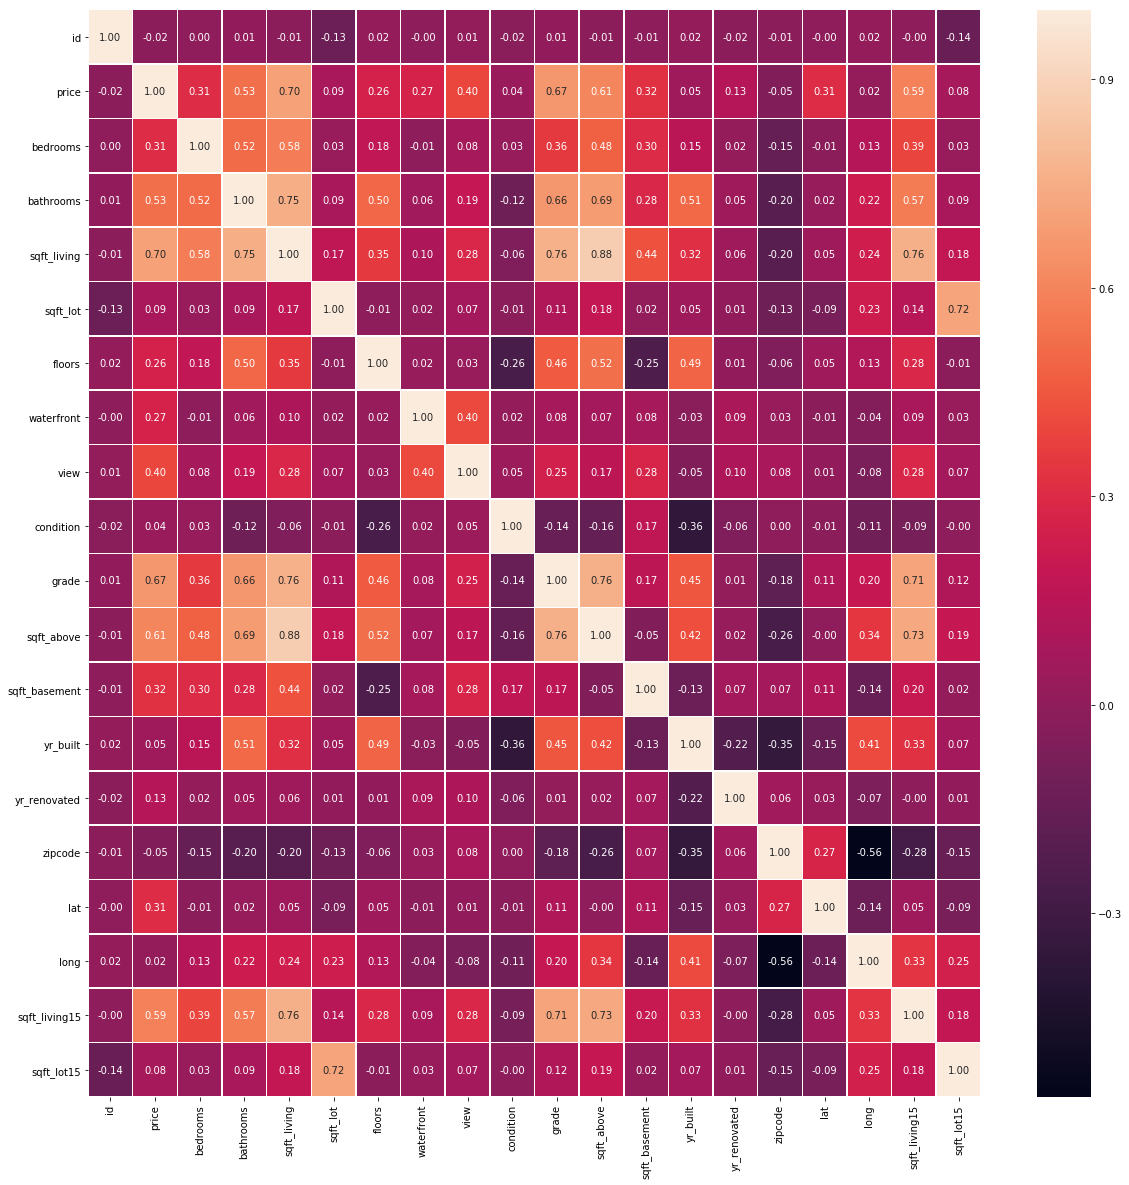

In [8]:
f, ax = plt.subplots(figsize =(20,20))
sns.heatmap(data.corr(),annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

Kolerasyon ile özellikler arasındaki ilişkileri daha net görebilir ve modelimizi bu ilişkilere göre çok daha kolay bir şekilde kurabiliriz. Görselleştirme ile verimizi tanımaya devam edelim. 

## Verinin Görselleştirilmesi

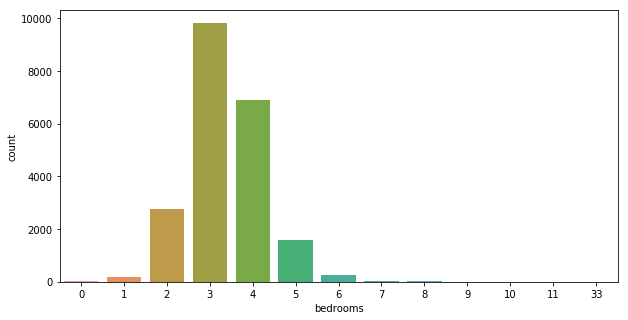

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(data.bedrooms)
plt.show()

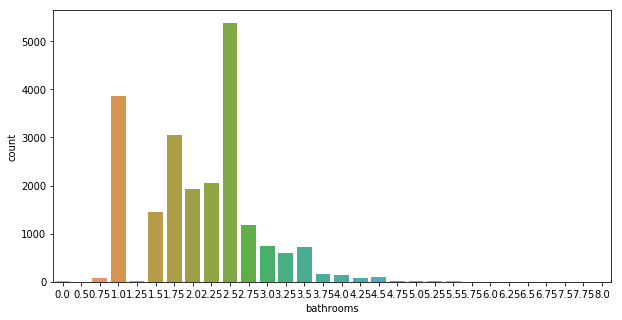

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(data.bathrooms)
plt.show()

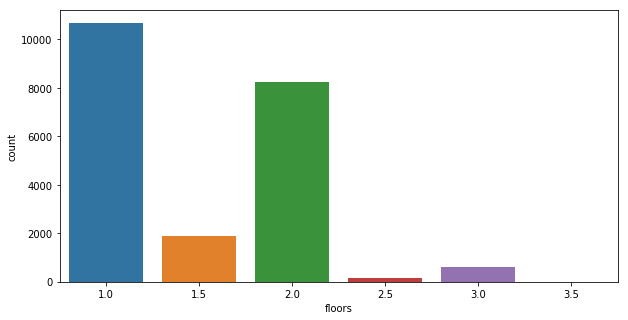

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(data.floors)
plt.show()

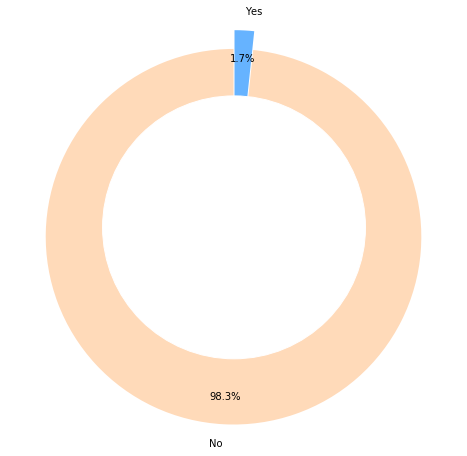

In [12]:
labels = ['No','Yes']
sizes = [data.query('view == 0').view.count(),data.query('view == 1').view.count()]
#colors
colors = ['#ffdaB9','#66b3ff']
#explsion
explode = (0.05,0.05)
plt.figure(figsize=(8,8)) 
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85,explode=explode)
p=plt.gcf()
plt.axis('equal')
p.gca().add_artist(my_circle)
plt.show()

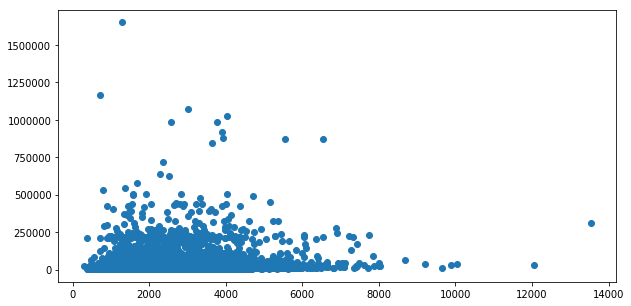

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(x=data.sqft_living,y=data.sqft_lot)
plt.show()

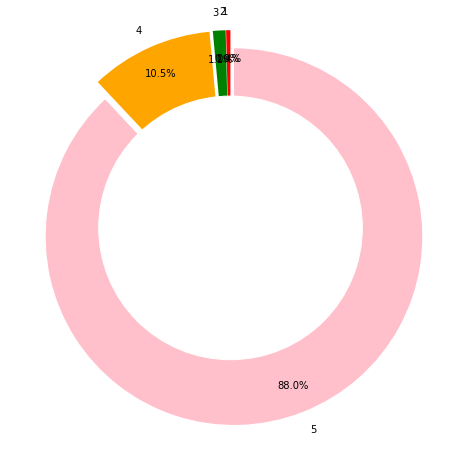

In [14]:
labels = ['1','2','3','4','5']
sizes = [data.query('grade == 1').grade.count(),data.query('grade == 2').grade.count(),data.query('grade == 3').grade.count()
        ,data.query('grade == 4').grade.count(),data.query('grade == 5').grade.count()]
#colors
colors = ['red','blue','green','orange','pink']
#explsion
explode = (0.05,0.05,0.05,0.05,0.05)
plt.figure(figsize=(8,8)) 
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85,explode=explode)
p=plt.gcf()
plt.axis('equal')
p.gca().add_artist(my_circle)
plt.show()

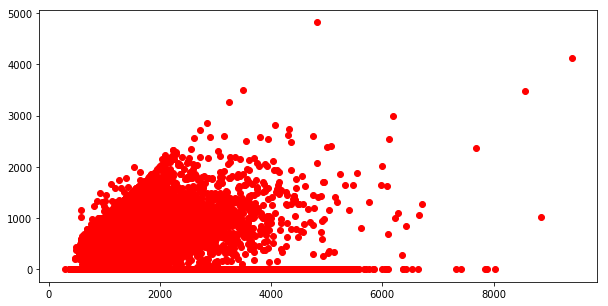

In [32]:
plt.figure(figsize=(10,5))
plt.scatter(x=data.sqft_above,y=data.sqft_basement,color="red")
plt.show()

In [16]:
maxpr=data.loc[data['price'].idxmax()]

# define a function to draw a basemap easily
def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

df_copy = data.copy()
# select a zipcode for the heatmap
#set(df['zipcode'])
#df_copy = df[df['zipcode']==98001].copy()
df_copy['count'] = 1
basemap = generateBaseMap()
# add carton position map
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
# add a marker for the house which has the highest price
folium.Marker([maxpr['lat'], maxpr['long']],popup='Highest Price: $'+str(format(maxpr['price'],'.0f')),
              icon=folium.Icon(color='green')).add_to(s)
# add heatmap
HeatMap(data=df_copy[['lat','long','count']].groupby(['lat','long']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap

## Regresyon Algoritmaları ile Tahmin(Prediction with Regression Algorithm)

### 1- Lineer Regresyon Algoritması

2 değişken arasındaki doğrusal ilişkinin bir doğru denklemi olarak tanımlanıp, değişkenin değerlerinden biri bilindiğinde diğeri hakkında tahmin yapılmasını sağlar. Veriler arasında doğru tahmini yapabilmek için veriler için en iyi doğruyu oluşturmak gerekir. En iyi doğruyu oluştururken tüm noktalara en yakın bölge tercih edilmelidir. Lineer Regresyon'da bir doğru oluşturacağımız için bir bağımlı ve bir bağımsız değişken olmak üzere toplam 2 değişken üzerinde çalışacağız. Ben bu algoritma için evin büyüklüğü ile fiyatı arasındaki ilişkiyi ele alacağım. Bu ilişkiye göre evin fiyatını tahmin etmeye çalışacağım. O halde başlayalım. :)

B0 : [-43580.74309447]
B1 : [[280.6235679]]
R Square Values : 0.4928532179037931


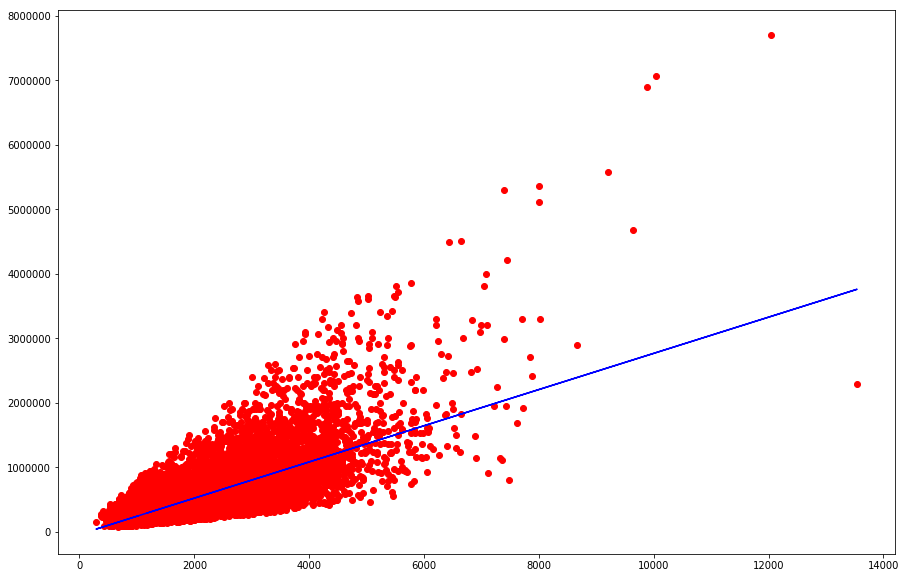

In [29]:
#kütüphane tanımlanması 
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

x = data['sqft_living'].values.reshape(-1,1)
y = data['price'].values.reshape(-1,1)

#Doğrunun oluşturulması
linear_reg.fit(x,y)

b0 = linear_reg.intercept_ 
b1 = linear_reg.coef_
#Tahminler
y_head = linear_reg.predict(x)

print("B0 :",b0)
print("B1 :",b1)

#Tahmin Skoru
from sklearn.metrics import r2_score
print("R Square Values :",r2_score(y,y_head)) 

plt.figure(figsize=(15,10))
plt.scatter(x,y,color="red")
plt.plot(x,y_head,color="blue")
plt.show()

Yukarıda yaptığımız çalışmayla evin büyüklüğünün fiyat konusunu neredeyse yarı yarıya etkilediğini görüyoruz. Tabiki bir evi alırken sadece büyüklük değil bir çok parametre önemli. Bu sebepten ötürü lineer regresyon bizim iyi bir sonuç çıkarmamız için yetmiyor. Eğer elimizde tek bir bağımsız değişken varsa bu algoritmadan sağlıklı sonuç alabiliriz. Eğer birden çok bağımsız değişken varsa aşağıdaki algoritmalardan verimiz için en iyi olanı seçip onunla çalışmalıyız. 

### 2- Multiple Linear Regresyon

Bir bağımlı değişken ile birden fazla bağımsız değişken arasındaki ilişkiyi inceleyen algoritmadır. Linear regresyon ile aynı mantığı kullanır. Sadece birden fazla bağımsız değişken içerir. Bende verimizde bulunan id, zipcode(posta kodu), satılma tarihi ve konum koordinatları dışındaki tüm verileri kullanarak bir model hazırlamaya çalışacağım. :) 

In [49]:
list_score = []
list_name = [] 
#kütüphane tanımlanması 
from sklearn.linear_model import LinearRegression
multi_linear_reg = LinearRegression()

x = data.drop(['id','price','zipcode','lat','long','date'],axis=1).values
y = data['price'].values.reshape(-1,1)
multi_linear_reg.fit(x,y)

b0 = multi_linear_reg.intercept_ 
b1 = multi_linear_reg.coef_
#Tahminler
y_head = multi_linear_reg.predict(x)

print("B0 :",b0)
print("B1 :",b1)

#Tahmin Skoru
from sklearn.metrics import r2_score
print("R Square Values :",r2_score(y,y_head))
list_score.append(r2_score(y,y_head))
list_name.append("Multiple Linear Regresyon")

B0 : [6195319.95187286]
B1 : [[-3.93066524e+04  4.57450017e+04  1.09268480e+02 -1.60061929e-03
   2.68787845e+04  5.79071616e+05  4.32353616e+04  1.95103595e+04
   1.19721824e+05  5.15164697e+01  5.77520103e+01 -3.57015920e+03
   1.01595783e+01  2.48732761e+01 -5.50504053e-01]]
R Square Values : 0.6537318108687113


Multi Lineer Regresyon ile oldukça iyi bir oranla tahmin yapabildik. %65 oranında doğru fiyat tahmin edebiliyoruz. Bu kesinlikle iyi bir oran şimdi öğreneceğimiz algoritmalar da bu oran oldukça fazla olabilir ya da olmayabilir. Böylelikler verimiz için en iyi algoritmayı da belirlemiş olacağız.

### 3- Polinominal Lineer Regresyon

Bir bağımlı birden fazla bağımsız değişken arasında polinomal bir artış söz konusu ise bu algoritma bize en doğru sonucu verecektir. Multi Lineer Regresyonda yaptığım uygulamayı aynı şekilde burada da yapıyorum.

In [50]:
#kütüphane tanımlaması
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
polynomial_reg = PolynomialFeatures(degree=4)

x = data.drop(['id','price','zipcode','lat','long','date'],axis=1).values
y = data['price'].values.reshape(-1,1)

polynomial_reg = PolynomialFeatures(degree =4)
x_polynomial = polynomial_reg.fit_transform(x)

reg = LinearRegression()
reg.fit(x_polynomial,y)
#Tahminler
y_head = reg.predict(x_polynomial)

#Tahmin Skoru
from sklearn.metrics import r2_score
print("R Square Values :",r2_score(y,y_head))
list_score.append(r2_score(y,y_head))
list_name.append("Polinominal Lineer Regresyon")

R Square Values : 0.8019069402461997


Polinominal Lineer Regresyon ile baya yüksek bir oranla tahmin yapabildik. Ev fiyatlarını bu algoritma ile %80 oranında doğru tahmin edebiliyoruz. Bu kesinlikle iyi bir oran şimdi öğreneceğimiz algoritmalar da bu oran oldukça fazla olabilir ya da olmayabilir. Böylelikler verimiz için en iyi algoritmayı da belirlemiş olacağız.

### 4- Karar Ağacı(Decision Tree) Regresyonu

Karar Ağaçları Regresyon Algoritması şu şekilde çalışıyor: Bağımsız değişkenleri bilgi kazancına göre aralıklara ayırıyor. Tahmin esnasında bu aralıktan bir değer sorulduğunda cevap olarak bu aralıktaki (eğitim esnasında öğrendiği) ortalamayı söyleyiveriyor. Bu sebeple karar ağacı regresyonu diğer regresyon modelleri gibi sürekli değil, kesiklidir. Yani belli bir aralıkta istenen tahminler için aynı sonuçları üretir. Karar Ağaçları bulunulan durumun entropi değerini (rastgelelik derecesini) düşüren seçimler yaparak bilgi kazancını (information gain) maksimize etmeye çalışır. Bunun için de her soruda (düğüm/node) hata fonksiyonunu tekrar hesaplayıp en düşük hataya sahip soruyu/durumu seçer. Multi Lineer Regresyonda yaptığım uygulamayı aynı şekilde burada da yapıyorum.

In [51]:
#kütüphane tanımlanması 
from sklearn.tree import DecisionTreeRegressor

x = data.drop(['id','price','zipcode','lat','long','date'],axis=1).values
y = data['price'].values.reshape(-1,1)

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x,y)

#Tahminler
y_head=tree_reg.predict(x)

#Tahmin Skoru
from sklearn.metrics import r2_score
print("R Square Values :",r2_score(y,y_head)) 
list_score.append(r2_score(y,y_head))
list_name.append("Karar Ağacı(Decision Tree) Regresyonu")

R Square Values : 0.9991302004579986


Sanırım veri setimiz için en iyi algoritma karar ağaçları oldu. Gene de son algoritmaya da bakmadan geçmeyelim.

### 5-Random Forest Regresyonu

Random Forest Algoritması, birden fazla karar ağacını oluşturur ve daha doğru ve istikrarlı bir tahmin elde etmek için onları birleştirir.Rastgele ormanın büyük bir avantajı, mevcut makine öğrenmesi sistemlerinin çoğunu oluşturan hem sınıflandırma hem de regresyon problemleri için kullanılabilmesidir. Birden çok karar ağacını kullanarak bir sonuç oluşturduğundan Ensemble Learning kategorisine de girer. Esemble Learning, aynı anda birden çok makine öğrenmesi algoritmalarının çalışarak sonuç oluşturması işlemidir. Son olarak burdaki sonucu da inceleyelim.

In [52]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=300, random_state = 42)

x = data.drop(['id','price','zipcode','lat','long','date'],axis=1).values
y = data['price'].values.reshape(-1,1)

reg.fit(x,y)
y_head = reg.predict(x)

#Tahmin Skoru
from sklearn.metrics import r2_score
print("R Square Values :",r2_score(y,y_head)) 
list_score.append(r2_score(y,y_head))
list_name.append("Random Forest Regresyonu")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


R Square Values : 0.9665057725667762


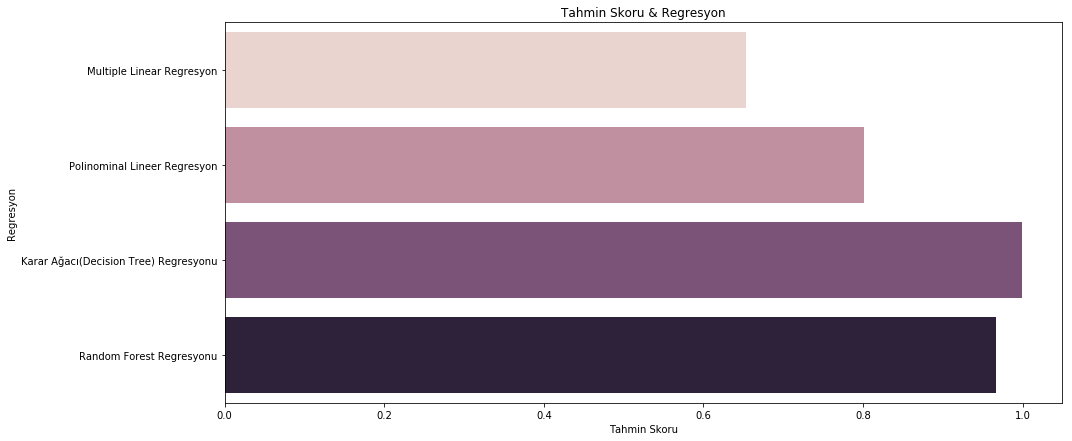

In [55]:
f,ax = plt.subplots(figsize = (15,7))
sns.barplot(x=list_score,y=list_name,palette = sns.cubehelix_palette(len(list_score)))
plt.xlabel("Tahmin Skoru")
plt.ylabel("Regresyon")
plt.title('Tahmin Skoru & Regresyon')
plt.show()

Bu verilerimiz için en iyi algoritmamız karar ağaçları ile random forest algoritması oldu. Bunu yukarıda yaptığımız bar plot grafiği ile daha iyi gözlemlemiş olduk. Bir daha ki yazımızda görüşmek üzere. :)